## Unsupervised Machine Learning

    Movie-1 - [ 'Drama']

    Movie-2 ['Drama', 'Action']

    Movie-3 ['Scifi', 'comedy']

    Movie-4 ['Thriller', 'Action', 'Romance']


### Bag of Words

#### vocab -> all possible words that can appear in your document 

### Un-supervised Machine Learning

### Principle Compnent Analysis

In [4]:
from sklearn.decomposition import PCA

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
from sklearn.datasets import load_boston

In [7]:
data = load_boston()

In [9]:
import warnings

In [10]:
warnings.filterwarnings(action='ignore')

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [12]:
df = pd.DataFrame(data['data'], columns=data['feature_names'])

In [13]:
target = data['target']

In [15]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [16]:
df.shape

(506, 13)

## Dimensity Reduction 13 --> 2 

In [17]:
scalar = StandardScaler()

In [19]:
scaled = scalar.fit_transform(df)

In [21]:
df = pd.DataFrame(scaled, columns=data['feature_names'])

In [22]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


In [70]:
pca = PCA(n_components=5)

In [71]:
pca.fit(scaled)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [72]:
new_features = pca.transform(scaled)

In [56]:
new_features[:5]

array([[-2.09829747,  0.77311275,  0.34294273, -0.89177403,  0.42307036],
       [-1.45725167,  0.59198521, -0.69519931, -0.48745853, -0.19587567],
       [-2.07459756,  0.5996394 ,  0.1671216 , -0.73920419, -0.93453406],
       [-2.61150357, -0.00687062, -0.10028413, -0.34372124, -1.10495596],
       [-2.45818501,  0.09771195, -0.07534821, -0.42790688, -1.06592426]])

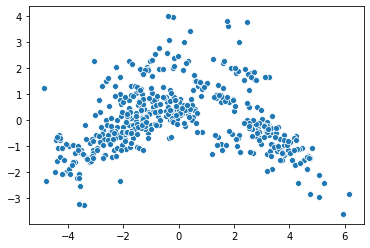

In [57]:
sns.scatterplot(new_features[:, 0], new_features[:, 1])
plt.show()

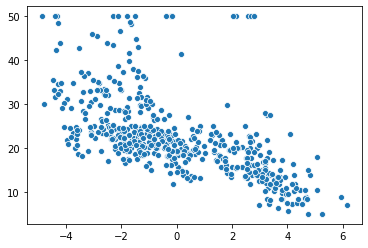

In [58]:
sns.scatterplot(new_features[:, 0], target)
plt.show()

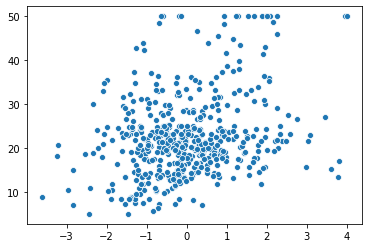

In [59]:
sns.scatterplot(new_features[:, 1], target)
plt.show()

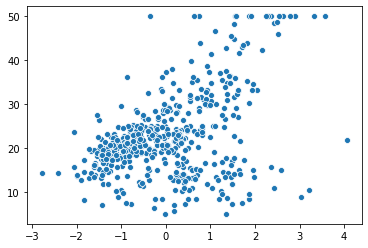

In [60]:
sns.scatterplot(new_features[:, 2], target)
plt.show()

In [61]:
from sklearn.linear_model import LinearRegression

In [76]:
model = LinearRegression()

In [77]:
model.fit(new_features, target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [78]:
from sklearn.metrics import r2_score

In [79]:
print(r2_score(target, model.predict(new_features))*100)

69.69794221303115


In [68]:
featues = data['data'][100:200]

In [69]:
featues

array([[1.4866e-01, 0.0000e+00, 8.5600e+00, ..., 2.0900e+01, 3.9476e+02,
        9.4200e+00],
       [1.1432e-01, 0.0000e+00, 8.5600e+00, ..., 2.0900e+01, 3.9558e+02,
        7.6700e+00],
       [2.2876e-01, 0.0000e+00, 8.5600e+00, ..., 2.0900e+01, 7.0800e+01,
        1.0630e+01],
       ...,
       [4.6660e-02, 8.0000e+01, 1.5200e+00, ..., 1.2600e+01, 3.5431e+02,
        8.6100e+00],
       [3.7680e-02, 8.0000e+01, 1.5200e+00, ..., 1.2600e+01, 3.9220e+02,
        6.6200e+00],
       [3.1500e-02, 9.5000e+01, 1.4700e+00, ..., 1.7000e+01, 3.9690e+02,
        4.5600e+00]])

In [73]:
n_f = pca.transform(featues)

In [75]:
n_f[:5]

array([[  84.72604276,   19.7645067 ,  -39.15035331,   98.22078173,
        -197.26274208],
       [  81.27594471,   17.39873758,  -38.75750669,   99.74384262,
        -198.39813069],
       [ 152.68237441,  -55.94457264,   57.49626374,   42.83607138,
         -84.59398717],
       [  88.53040876,   21.65045881,  -40.60099043,   97.2927615 ,
        -195.20241453],
       [  89.43409929,   22.24916581,  -39.80164383,   96.38410912,
        -195.02937689]])

In [81]:
model.predict(n_f)[:5]

array([  70.57653348,   75.48597563, -103.27920276,   57.40502511,
         60.05646613])

In [82]:
!head AFINN-111.json

{
"abandon": -2,
"abandoned": -2,
"abandons": -2,
"abducted": -2,
"abduction": -2,
"abductions": -2,
"abhor": -3,
"abhorred": -3,
"abhorrent": -3,


In [83]:
messegs = [
    
    'I admire you for you project, best of luck for future work',
    "you don't deserve it go to hell you idiot"
]

In [84]:
import json
with open("AFINN-111.json", 'r') as fp:
    word_dict = json.load(fp)
    fp.close()

In [86]:
from nltk.corpus import stopwords

In [87]:
eng_stop_word = stopwords.words('english')

In [93]:

for msg in messegs:
    score = 0
    for word in msg.split():
        word = word.strip().lower()
        if word not in eng_stop_word:
            if word in word_dict:
                score += word_dict[word]
    if score > 0:
        sentiment = 'Positive'
    if score == 0:
        sentiment = "Netural"
    if score < 0:
        sentiment = 'Negative'
    print(msg,'\t', score, "\t", sentiment)

I admire you for you project, best of luck for future work 	 9 	 Positive
you don't deserve it go to hell you idiot 	 -7 	 Negative


In [94]:
!pip install textblob

#### Sentiment Analysis using Textblob

In [95]:
from textblob import TextBlob

In [101]:
model.sentiment

Sentiment(polarity=0.5, subjectivity=0.2125)

In [102]:
for msg in messegs:
    model = TextBlob(msg)
    score = model.sentiment.polarity
    if score > 0:
        sentiment = 'Positive'
    elif score == 0:
        sentiment = 'Netural'
    else:
        sentiment = "Negative"
    print(msg, '\t', sentiment, 'subjectivity: ', model.subjectivity, 'polarity: ', model.polarity)

I admire you for you project, best of luck for future work 	 Positive subjectivity:  0.2125 polarity:  0.5
you don't deserve it go to hell you idiot 	 Negative subjectivity:  0.8 polarity:  -0.8


### Sentiment Analysis

    Word Frequency

    love - 5

    hate  - 0

    thank you - 3

    ...

    pos = [ list of positive words ]

    neg = [ list of negative words ]

### Clustering

[k-means visulazation](https://www.naftaliharris.com/blog/visualizing-k-means-clustering/)

In [104]:
from time import sleep
from tqdm import tqdm 

for _ in tqdm(range(300)):
    sleep(1)

100%|███████████████████████████████████████████████████████████████████████| 300/300 [05:00<00:00,  1.00s/it]


    Image Classification / Description using IBM cloud & IBM Watson Services  

    development / research  -> 30 % -> salary high


    implementation -> 70 % -> salary low

#### K-Means Clustering

    used to cluster data on the basis of similarity between features

__step1__ Data collection

In [105]:
from sklearn.datasets import make_blobs

In [137]:
feature, target = make_blobs(n_samples=200, n_features=2, centers=3, 
                 cluster_std=1)

In [138]:
feature.shape

(200, 2)

In [139]:
target.shape

(200,)

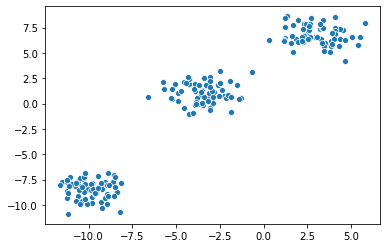

In [140]:
sns.scatterplot(feature[:, 0], feature[:, 1])
plt.show()

In [141]:
target[:5]

array([0, 0, 2, 1, 0])

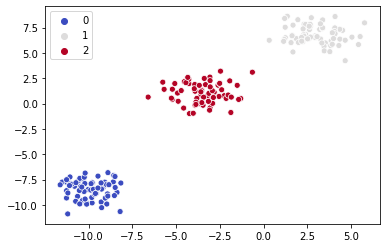

In [143]:
sns.scatterplot(feature[:, 0], feature[:, 1], hue=target, palette='coolwarm')
plt.show()

In [144]:
from sklearn.cluster import KMeans

In [145]:
model = KMeans(n_clusters=2)

In [146]:
model.fit(feature) # unsupervise learning

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [147]:
pred = model.predict(feature)

In [151]:
pred[:10]

array([1, 1, 0, 0, 1, 1, 0, 0, 0, 1])

In [152]:
target[:10]

array([0, 0, 2, 1, 0, 0, 1, 2, 2, 0])

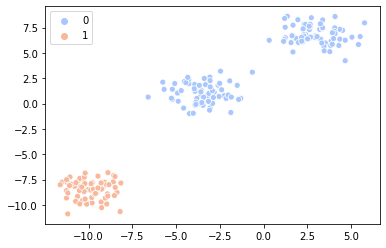

In [153]:
sns.scatterplot(feature[:, 0], feature[:, 1], hue=pred, palette='coolwarm')
plt.show()

In [154]:
model = KMeans(n_clusters=3)

In [155]:
model.fit(feature)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [156]:
pred = model.predict(feature)

In [157]:
pred[:10]

array([1, 1, 2, 0, 1, 1, 0, 2, 2, 1])

In [158]:
target[:10]

array([0, 0, 2, 1, 0, 0, 1, 2, 2, 0])

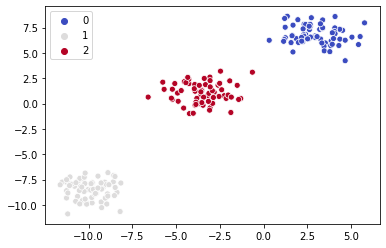

In [159]:
sns.scatterplot(feature[:, 0], feature[:, 1], hue=pred, palette='coolwarm')
plt.show()

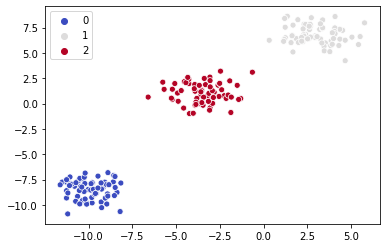

In [160]:
sns.scatterplot(feature[:, 0], feature[:, 1], hue=target, palette='coolwarm')
plt.show()

In [169]:
feature, target = make_blobs(n_samples=200, n_features=2, centers=3, 
                 cluster_std=2.6)

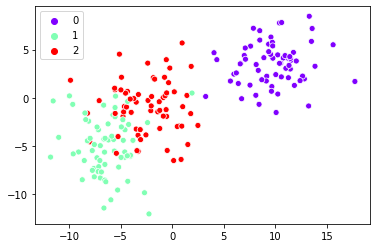

In [171]:
sns.scatterplot(feature[:, 0], feature[:, 1], hue=target, palette='rainbow')
plt.show()

In [172]:
model = KMeans(n_clusters=3)
model.fit(feature)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [173]:
pred = model.predict(feature)

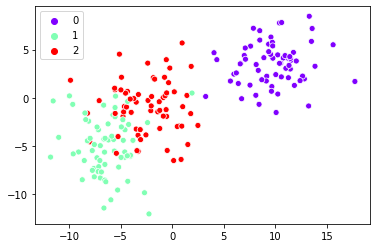

In [174]:
sns.scatterplot(feature[:, 0], feature[:, 1], hue=target, palette='rainbow')
plt.show()

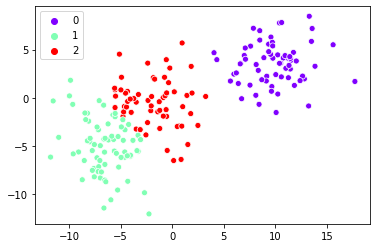

In [175]:
sns.scatterplot(feature[:, 0], feature[:, 1], hue=pred, palette='rainbow')
plt.show()

In [176]:
from sklearn.metrics import adjusted_mutual_info_score, adjusted_rand_score

In [179]:
adjusted_mutual_info_score(target, pred)*100

75.53531299329383

In [181]:
adjusted_rand_score(target, pred)*100

77.3264245882329

In [189]:
y_pred = [ 1, 0, 0, 1, 1, ]
actual = [ 1, 0, 0, 1, 1]

In [190]:
adjusted_rand_score(y_pred, actual)

1.0

In [191]:
adjusted_mutual_info_score(y_pred, actual)

1.0

In [194]:
model.cluster_centers_

array([[ 9.83806648,  3.5158025 ],
       [-6.51342922, -5.02263702],
       [-1.79210766, -0.54067134]])

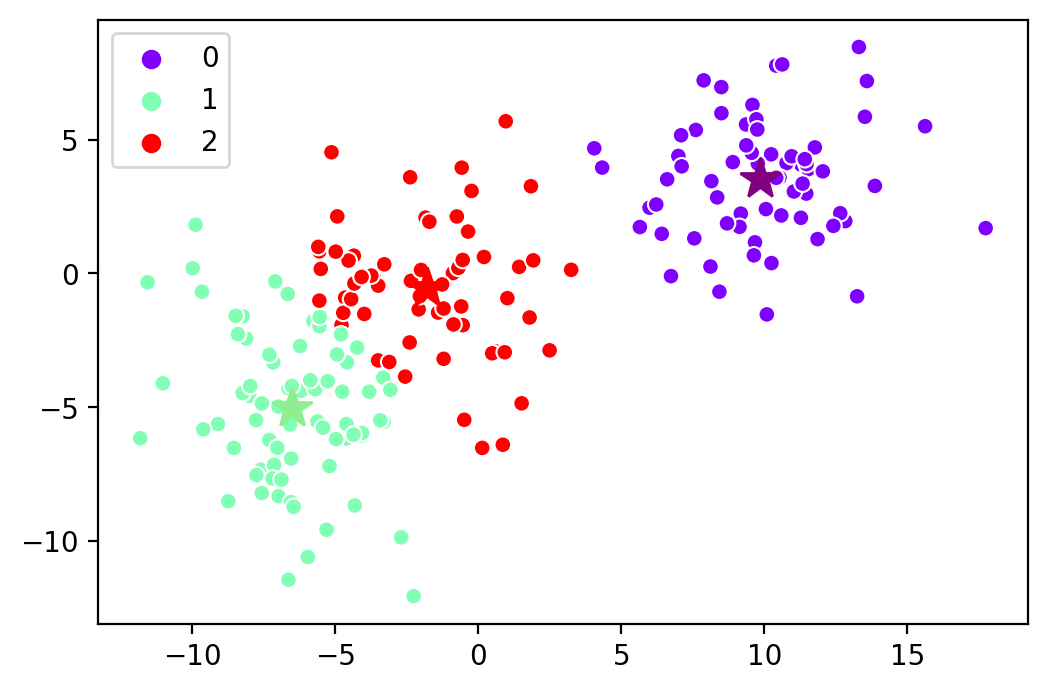

In [200]:
plt.figure(dpi=200)
color = [ 'purple', 'lightgreen', 'red']
for cl, p in zip(color, model.cluster_centers_):
    plt.plot(p[0], p[1], '*', ms=15, color=cl)
sns.scatterplot(feature[:, 0], feature[:, 1], hue=pred, palette='rainbow')
plt.show()

In [211]:
iris = sns.load_dataset('iris')

In [212]:
features = iris.drop('species', axis=1)

In [213]:
from sklearn.model_selection import train_test_split

In [214]:
X_train, X_test, y_train, y_test = train_test_split(features, iris['species'])

In [215]:
model = KMeans(n_clusters=3)

In [219]:
model.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [220]:
pred = model.predict(X_test)

In [221]:
pred[:10]

array([2, 2, 2, 2, 2, 1, 2, 0, 0, 1])

In [223]:
y_test[:10].to_numpy()

array(['virginica', 'versicolor', 'versicolor', 'virginica', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'virginica', 'setosa'],
      dtype=object)

In [224]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


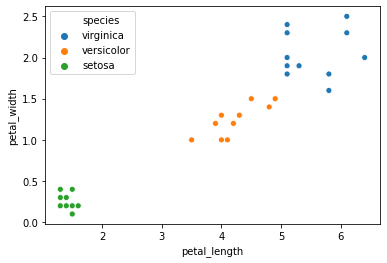

In [230]:
sns.scatterplot(X_test.iloc[:, 2], X_test.iloc[:, 3], hue=y_test)
plt.show()

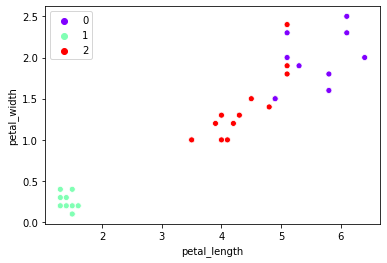

In [235]:
sns.scatterplot(X_test.iloc[:, 2], X_test.iloc[:, 3], hue=pred, palette='rainbow')
plt.show()

### Document Clustering

spam-ham --> message --> vector --> clustering 